C:\Users\mynam\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url']) 


Saving figure some_digit_plot


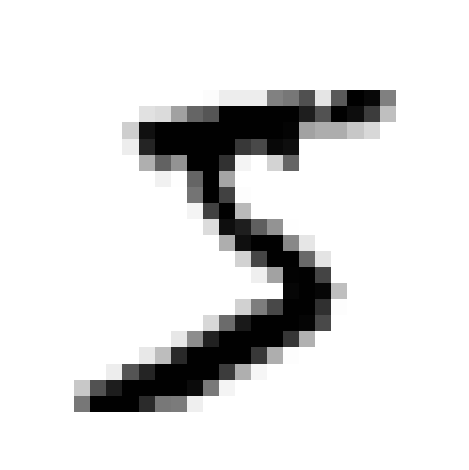

Saving figure more_digits_plot


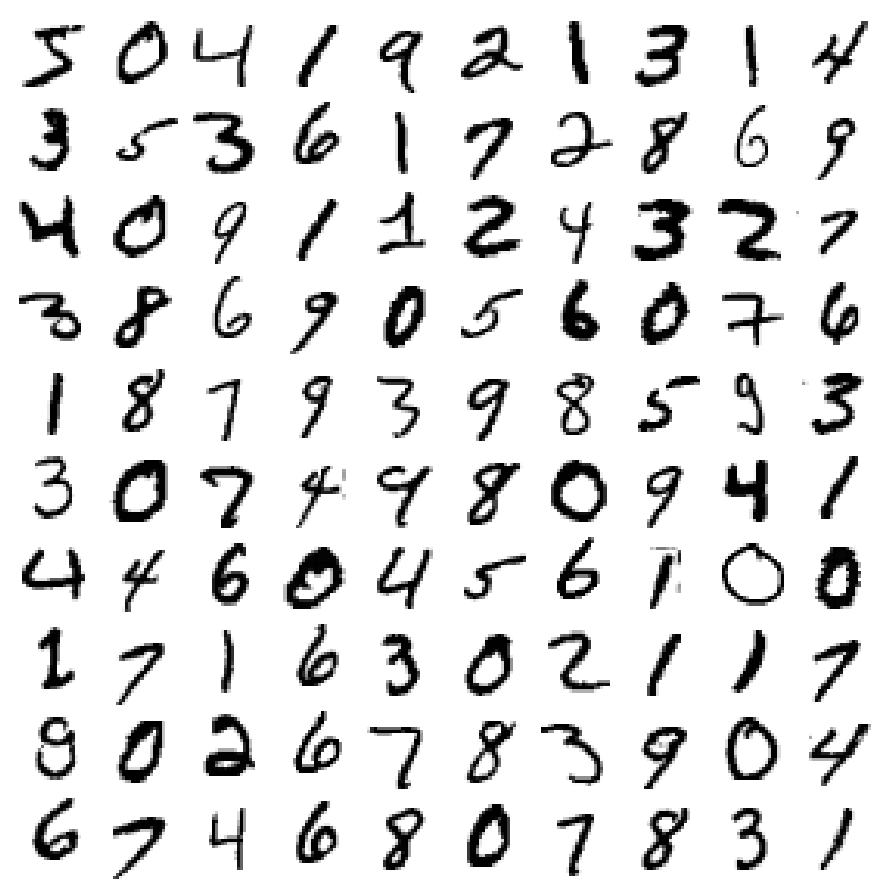

[ True] 


Precision: 0.8370879772350012 


Detection Rate of 5s: 0.6511713705958311 


F1 Score: 0.7325171197343846 




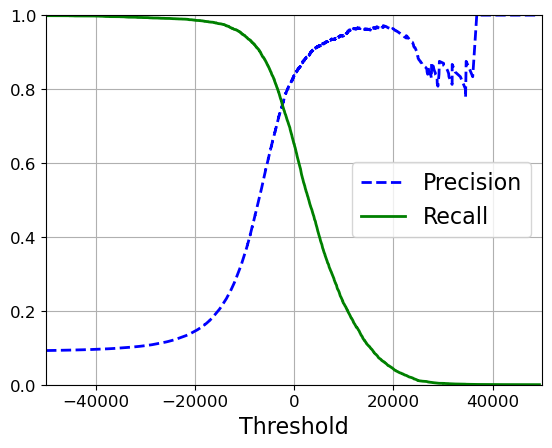

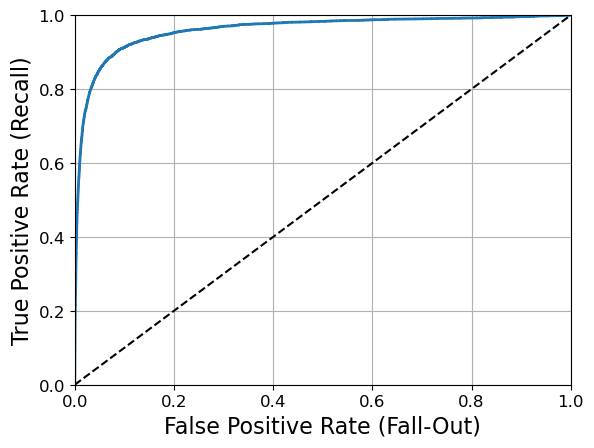

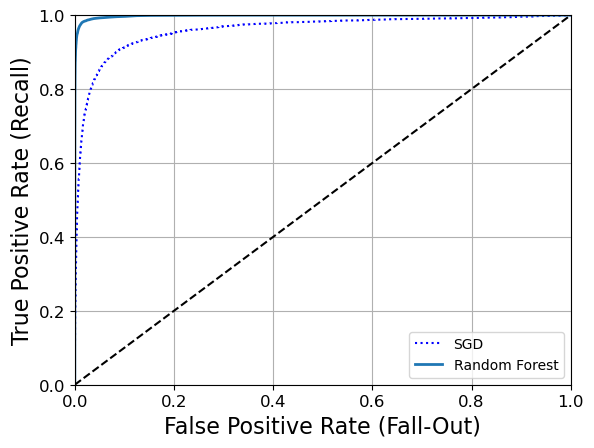

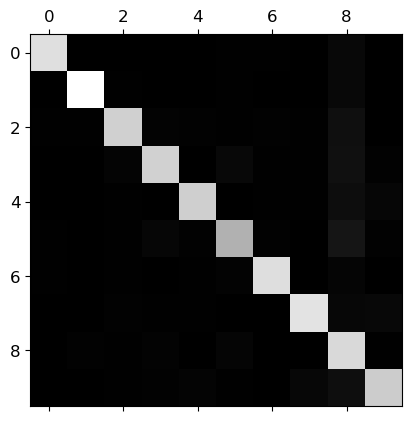

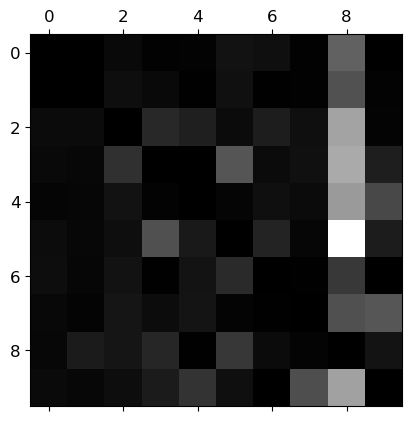

Saving figure error_analysis_digits_plot


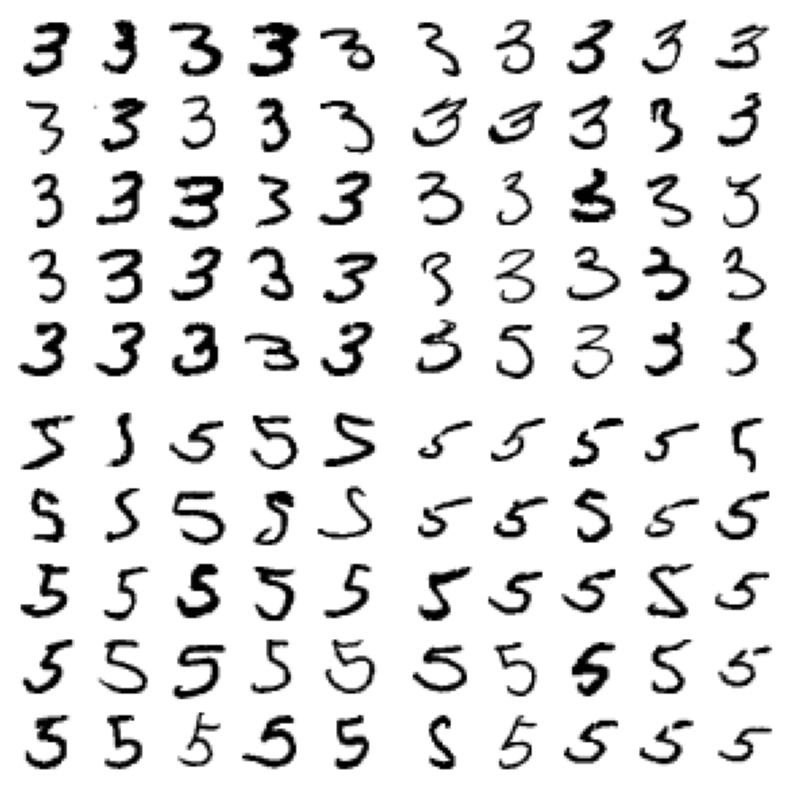

Saving figure noisy_digit_example_plot


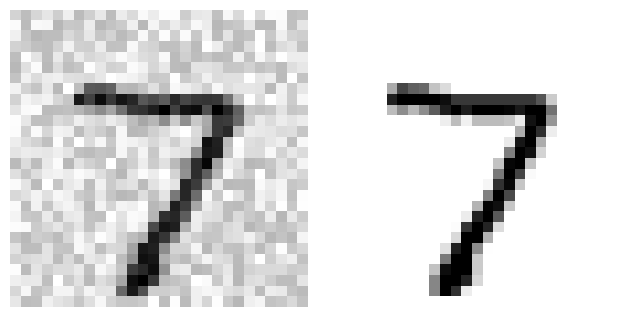

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  10.1s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=   9.8s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=   9.9s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=   9.8s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  10.1s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=   9.7s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=   9.8s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=   9.9s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=   9.6s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=   9.6s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  10.0s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

In [3]:
#setup idk c:
# Python ≥3.5 is required
#IGNORE THE BIG STINKY WARNING IT'S CRINGE AND USELESS HAHAHAHAH
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
#-------------------------------------------------------------------------------------------

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist.keys(), '\n\n')

X, y = mnist["data"], mnist["target"]
# print(X.shape, '\n\n')
# print(y.shape, '\n\n')

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

#y[0] to see the label

#casting y to an integer
y = y.astype(np.uint8)

#showing more numbers
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

#starting my train set c:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#binary classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

print(sgd_clf.predict([some_digit]), '\n\n')

#-----------------------------------------------------------------------

#cross validation lmao

#copying the booky time 
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone

# skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

#let this cook, it takes time lmao 
# for train_index, test_index in skfolds.split(X_train, y_train_5):
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train[train_index]
#     y_train_folds = y_train_5[train_index]
#     X_test_fold = X_train[test_index]
#     y_test_fold = y_train_5[test_index]

#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     n_correct = sum(y_pred == y_test_fold)
#     print(n_correct / len(y_pred), '\n\n')

#do not let the above cook, it burned the whoel damn kitchen down, move to cross val score

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

#not 5 lmao
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
#biased since the large majority is not 5
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

#-----------------------------------------------------------------------------------

#better way to evaluate using confusion matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

#precision and recall?
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)
cm = confusion_matrix(y_train_5, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])
recall_score(y_train_5, y_train_pred)

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

#----------------------------------------------------------------------------------------------

#precision and recall trade off lmao
from sklearn.metrics import precision_score, recall_score

print('Precision:', precision_score(y_train_5, y_train_pred), '\n\n')
print('Detection Rate of 5s:', recall_score(y_train_5, y_train_pred), '\n\n')
      
      
#f1 score
from sklearn.metrics import f1_score
print('F1 Score:', f1_score(y_train_5, y_train_pred), '\n\n')

#decision score to help predict prayge
y_scores = sgd_clf.decision_function([some_digit])
threshold = 0 #setting to 8000 would return to false
y_some_digit_pred = (y_scores > threshold)

#all scores
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = "decision_function")

#-------------------------------------------------------------------------------------------

#precision recall curve
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

#chart here, copy and paste, matplot lib precision recall c:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

threshold_90_precision = thresholds[np.argmax(precisions >= 90)]
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90) #90 precision
recall_score(y_train_5, y_train_pred_90) #43.7 recall

#roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

#copy and paste the code in later again [...]
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown


plot_roc_curve(fpr, tpr)
plt.show()

#comparison with a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method = "predict_proba")

y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

#roc_auc_score(y_train_5, y_scores_forest) #99% precision, and 86.8% recall

#OvR or OvO
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

#forcing OvO or OvR
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])
len(ovr_clf.estimators_)

#SGDClassifier
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

#you can improve sgd score using standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

#error analysis
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

#multi label classification, i guess
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([some_digit])
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

#multioutput
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()


#questions idk c:
from sklearn.model_selection import GridSearchCV
#1.
# param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

# knn_clf = KNeighborsClassifier()
# grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
# grid_search.fit(X_train, y_train)

# print('Hyperparameters:', grid_search.best_params_)
# print('Best Score:', grid_search.best_score_)

#2
# from scipy.ndimage.interpolation import shift

# def shift_image(image, dx, dy):
#     image = image.reshape((28, 28))
#     shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
#     return shifted_image.reshape([-1])

# image = X_train[1000]
# shifted_image_down = shift_image(image, 0, 5)
# shifted_image_left = shift_image(image, -5, 0)

# plt.figure(figsize=(12,3))
# plt.subplot(131)
# plt.title("Original", fontsize=14)
# plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
# plt.subplot(132)
# plt.title("Shifted down", fontsize=14)
# plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
# plt.subplot(133)
# plt.title("Shifted left", fontsize=14)
# plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
# plt.show()

# X_train_augmented = [image for image in X_train]
# y_train_augmented = [label for label in y_train]

# for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
#     for image, label in zip(X_train, y_train):
#         X_train_augmented.append(shift_image(image, dx, dy))
#         y_train_augmented.append(label)

# X_train_augmented = np.array(X_train_augmented)
# y_train_augmented = np.array(y_train_augmented)

# shuffle_idx = np.random.permutation(len(X_train_augmented))
# X_train_augmented = X_train_augmented[shuffle_idx]
# y_train_augmented = y_train_augmented[shuffle_idx]

# knn_clf = KNeighborsClassifier(**grid_search.best_params_)
# knn_clf.fit(X_train_augmented, y_train_augmented

#oh pog a 0.5 accuracy boost lmao
